In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.read_excel("../data/teenage_mental.xls")

,기간,구분,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,기간,구분,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [3]:
pd.read_excel("../data/teenage_mental.xls",header=1)

,기간,구분,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [4]:
pd.read_excel("../data/teenage_mental.xls",header=1,usecols = "C:K")

,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [6]:
col_names =['스트레스','스트레스남학생','스트레스여학생','우울감경험률',
           '우울남학생','우울여학생','자살생각율','자살남학생','자살여학생']

pd.read_excel("../data/teenage_mental.xls",header=1,usecols = "C:K", names=col_names)

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [7]:
raw_data = pd.read_excel("../data/teenage_mental.xls",header=1,usecols = "C:K", names=col_names)

raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [8]:
raw_data.loc[1]=100. - raw_data.loc[0]
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


In [9]:
raw_data['응답'] = ['그렇다','아니다']
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생,응답
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2,그렇다
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8,아니다


In [10]:
raw_data.set_index('응답',drop=True, inplace=True)
# inplace = True => 원본 파일도 변경시킴
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


## 데이터를 그래프로 표현하기

In [16]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False # - 기호 깨지는 것 방지
#f_path = '/Library/Fonts/AppleGothic.ttf'(맥)
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name() # - 글씨 깨지는 것 방지
rc('font', family=font_name)

In [11]:
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


<Axes: ylabel='스트레스'>

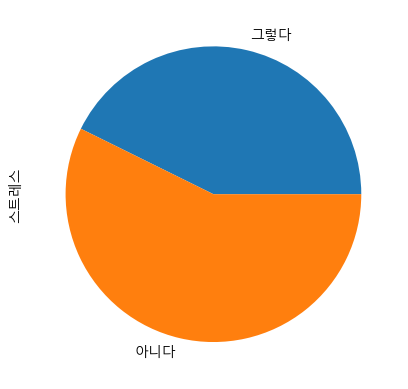

In [17]:
raw_data['스트레스'].plot.pie()

<Axes: ylabel='스트레스'>

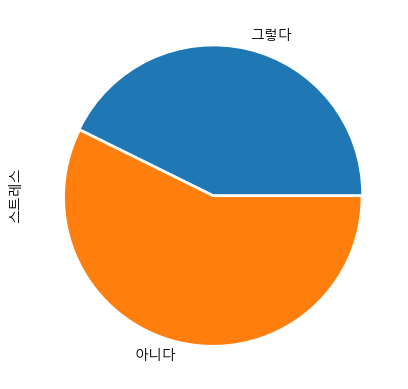

In [24]:
raw_data['스트레스'].plot.pie(explode=[0,0.02])

Text(0, 0.5, '')

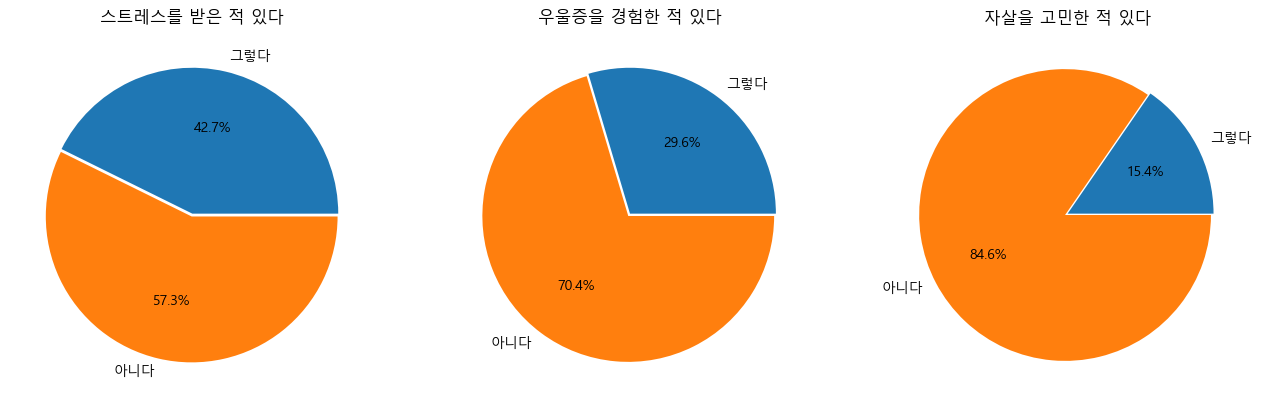

In [23]:
f,ax = plt.subplots(1,3,figsize=(16,8))

raw_data['스트레스'].plot.pie(explode=[0,0.02],ax=ax[0],autopct='%1.1f%%')
ax[0].set_title('스트레스를 받은 적 있다')
ax[0].set_ylabel('')

raw_data['우울감경험률'].plot.pie(explode=[0,0.02],ax=ax[1],autopct='%1.1f%%')
ax[1].set_title('우울증을 경험한 적 있다')
ax[1].set_ylabel('')

raw_data['자살생각율'].plot.pie(explode=[0,0.02],ax=ax[2],autopct='%1.1f%%')
ax[2].set_title('자살을 고민한 적 있다')
ax[2].set_ylabel('')

- matplotlib.pyplot.subplots는 figure와 axes 오브젝트를 반환하는데
- f,ax로 받으면 , figure와 axes 의 속성 하나하나 지정할 수 있음
- subplot로 3개이므로 ax[0],ax[1],ax[2]까지 각각 속성을 지정할 수 있음

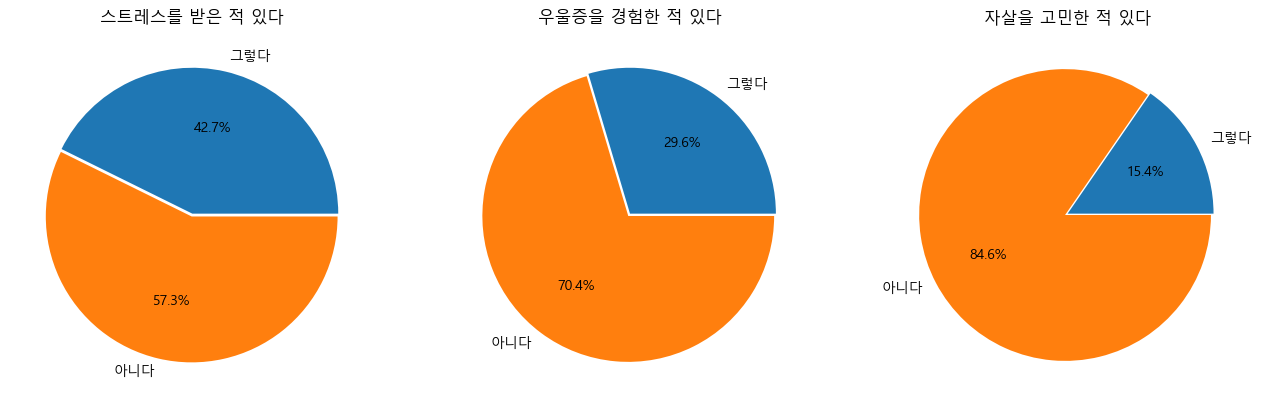

In [25]:
f,ax = plt.subplots(1,3,figsize=(16,8))

raw_data['스트레스'].plot.pie(explode=[0,0.02],ax=ax[0],autopct='%1.1f%%')
ax[0].set_title('스트레스를 받은 적 있다')
ax[0].set_ylabel('')

raw_data['우울감경험률'].plot.pie(explode=[0,0.02],ax=ax[1],autopct='%1.1f%%')
ax[1].set_title('우울증을 경험한 적 있다')
ax[1].set_ylabel('')

raw_data['자살생각율'].plot.pie(explode=[0,0.02],ax=ax[2],autopct='%1.1f%%')
ax[2].set_title('자살을 고민한 적 있다')
ax[2].set_ylabel('')

plt.show()